# Ejercicio 1.
**Considera en el plano el recinto cerrado finito definido por las funciones $y=x^2$ y $100 x=y^2$ al cual pertenece el punto de coordenadas $(2,12)$. Realiza un gráfico del mismo.**

Empezamos definiendo el conjunto de puntos que vamos a utilizar para pintar nuestro recinto,  para decidir los límites del conjunto, resolvemos $0 = x^2 - 10\sqrt{x} \implies x \in \{0,10^{2/3}\}$

In [1]:
x = seq(from = 0, to = 10^(2/3), by = 0.1)

Declaramos ambas funciones como funciones de `R`.

In [2]:
f1 <- function(x){
    return(x^2)
}
f2 <- function(x){
    return(sign(x)*10*sqrt(abs(x)))
}

Usamos `plot` para pintar el contorno de la primera función y deliminar los ejes.
Para rellenar el contorno utilizamos la función `polygon` que acepta como parametro la lista de puntos. Concatenamos las listas dandole la vuelta a la segunda mitad (con `rev`) para que el poligono se cierre correctamente.
El parámetro `lwd` nos permite seleccionar el grosor del borde.

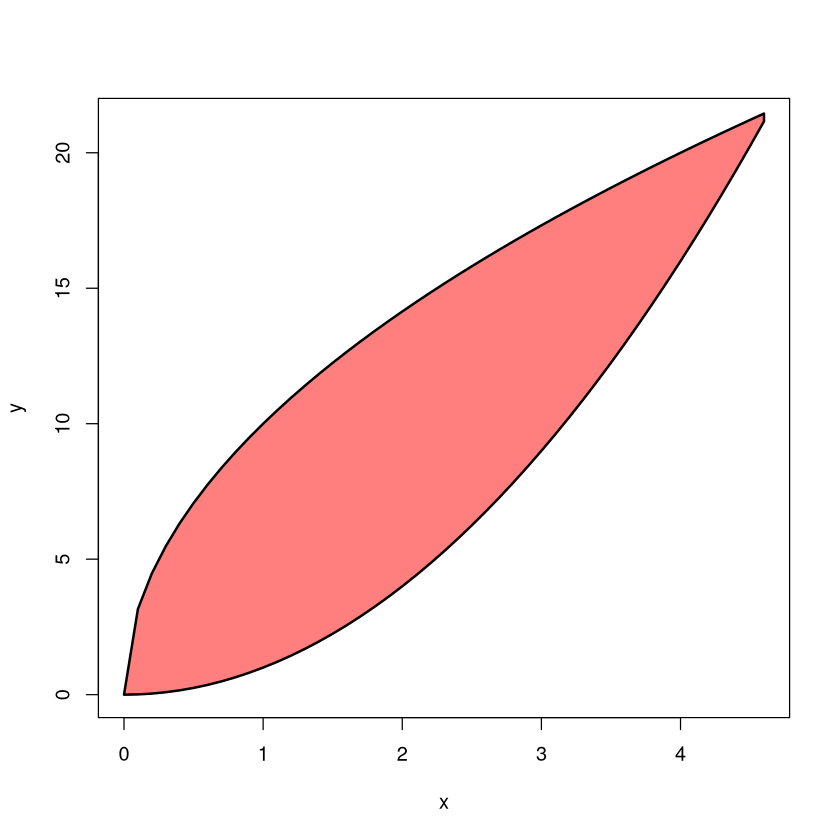

In [3]:
plot(x,f1(x), type="l", ylab = "y")
polygon(
    c(x,rev(x)),
    c(f1(x), rev(f2(x))),
    col=rgb(1, 0, 0,0.5),
    border="black",
    lwd = 2
)

# Ejercicio 2.
**Construye una función que indique si un punto cualquiera del plano pertenece al interior de ese recinto, al borde o al exterior. Comprueba que $(2,12)$ es interior. Aplícala a los puntos $(0,0)$, $(-1,-1)$ y $(30,30)$ y comenta los resultados.**

La función comprueba si el punto $p$ se encuentra dentro de el recinto cerrado delimitado por $f_1$ y $f_2$ donde $f_1 < f_2$. 

Por lo tanto un punto $(x,y)$ estará en el interior si y solo si 
$$
f_1(x) < y < f_2(x)
$$
Por otro lado, estará en la frontera si y solo si, coincide con uno de los dos y se encuentra al lado correcto del otro:
$$
f_1(x) = y <= f_2(x)\quad \text{ o } \quad f_1(x) <= y = f_2(x)
$$

In [4]:
check_inside_region <- function(f1 = f1, f2 = f2, p){
    x = p[1]
    y = p[2]
    if (y > f1(x) && y < f2(x))
        return("Dentro")
    if ((y == f1(x) && y <= f2(x)) || (y >= f1(x) && y == f2(x)))
        return("Borde")
    return("Exterior")
}

Comprobamos la función con los puntos $(2,12), (0,0), (-1,-1)$ y $(30,30)$.

In [5]:
check_inside_region(f1,f2,c(2,12))
check_inside_region(f1,f2,c(0,0))
check_inside_region(f1,f2,c(-1,-1))
check_inside_region(f1,f2,c(30,30))

[1] "Dentro"

[1] "Borde"

[1] "Exterior"

[1] "Exterior"

# Ejercicio 3.
**Construye una función que seleccione un valor, que llamamos $A$, de una distribución uniforme en el intervalo $(-1/100,1/100)$, y otro, que llamamos $B$, de una distribución normal de media $0$ y varianza $1/100$. Añade $(A,B)$ al punto $(2,12)$ y obtendrás un punto que llamaremos $P_0$.**

In [6]:
ej3 <- function(){
    A <- runif(1, -1/100, 1/100)
    B <- dnorm(0, 1/100)
    return(c(2,12) + c(A, B))
}

In [7]:
P0 = ej3()
P0

[1]  2.003401 12.398922

# Ejercicio 4.
**Considera el recorrido aleatorio con barrera absorbente definido del siguiente modo: sea un punto que en el tiempo $t=0$ comienza en el origen, $P_0$ del apartado anterior, y se desplaza del siguiente modo:**
 1. **En cada tiempo $t, t=1,2,\ldots$ se lanza un dado dos veces y una moneda dos veces.**
 2. **Si la suma de puntos de los dados es superior a $5$, la coordenada $x$ del punto se modifica para que aumente $5$ centésimas, si no, disminuye $5$ centésimas.**
 3. **Si las dos monedas son cara, la coordenada $y$ del punto se modifica para que aumente $5$ centésimas, si las dos son cruz, permanece inalterable y si no, disminuye $5$ centésimas.**
 4. **A continuación el punto salta hasta sus nuevas coordenadas.**
 5. **El proceso finaliza si, tras el salto, el punto alcanza el perímetro de la región o el exterior de la misma.**

**Escribe una función que simule el movimiento del punto y devuelva, para un número máximo, $M$, de pasos:**

  1. **La progresión aleatoria definida.**
  2. **Cuantos pasos han sido necesarios para llegar al límite o NA si no lo consigue.**

In [8]:
ej4 <- function(p, M = 10000){
    # Declaramos la lista de valores obtenidos, dividida en X e Y
    Xs <- list()
    Ys <- list()
    
    # Realizamos las M iteraciones
    for (i in 1:M) {
        # Si el punto está dentro, terminamos y devolvemos los valores
        if (check_inside_region(f1,f2,p) != "Dentro")
            return(list(Conseguido = TRUE, Pasos=i, X = Xs, Y = Ys))
        
        # Simulamos los dos lanzamientos de moneda con 2 
        # lanzamientos con reemplazamiento con 2 posibles valores
        monedas <- sample(2,2, replace=TRUE)
        # Hacemos lo mismo con los dados.
        dado <- sample(6,2, replace=TRUE)
        
        # Comprobaciones de dados
        if (dado[1] + dado[2] > 5)
            p = p + c(0.05,0)
        else
            p = p - c(0.05,0)
        # Comprobaciones de las monedas, un 1 simboliza cara. Luego si la suma es 
        #  2, ambos lanzamientos son cara.
        if (monedas[1] + monedas[2] == 2)
            p = p + c(0,0.05)
        # Por otro lado, si la suma es 3, los dos valores son distintos.
        else if (monedas[1] + monedas[2] == 3)
            p = p - c(0,0.05)
        # En caso de ser 2 cruces, no alteramos el punto
        
        Xs[[i]] <- p[1]
        Ys[[i]] <- p[2]
    }
    return (list(Conseguido = FALSE, Pasos = NA, X = Xs, Y = Ys))
}

# Ejercicio 5.
**Realiza una simulación concreta del proceso con $M=10000$ y represéntala gráficamente (mediante líneas) sobre la gráfica de la región.**

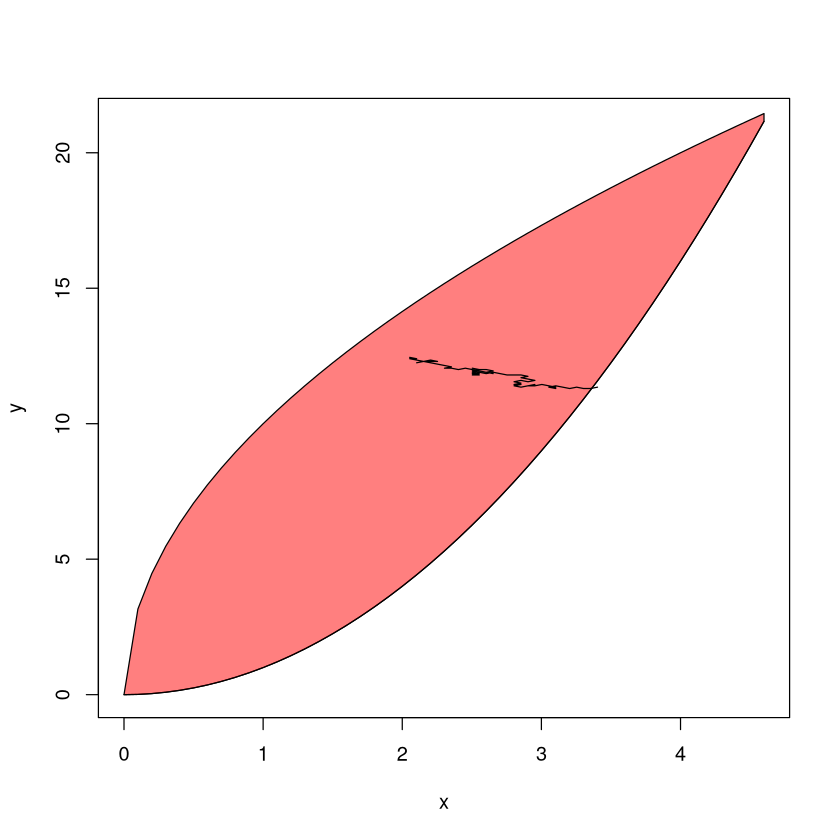

In [9]:
# Realizamos el experimento
a <- ej4(P0)

# Tomamos las coordenadas obtenidas.
Xs <- a$X
Ys <- a$Y

# Pintamos el recinto 
plot(x,f1(x), type="l", ylab = "y")
polygon(
    c(x,rev(x)),
    c(f1(x), rev(f2(x))),
    col=rgb(1, 0, 0,0.5)
)
# Pintamos la linea de puntos
points(Xs, Ys, type="l")

# Ejercicio 6.
**Realiza esta misma representación gráfica centrada en el punto de salida y con una anchura y altura de 2 unidades.**

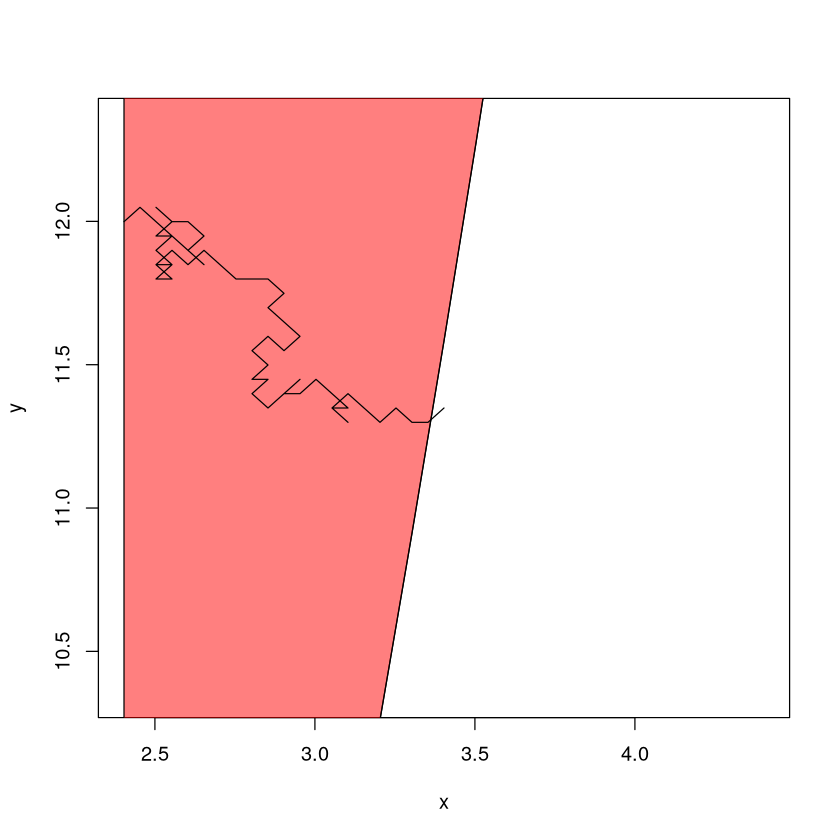

In [10]:
# Tomamos el como punto central el último de los devueltos
xcenter = Xs[length(Xs)][[1]]
ycenter = Ys[length(Ys)][[1]]

# Creamos la secuenta sobre la que vamos a pintar
x = seq(from = xcenter-1, to = xcenter+1, by = 0.1)
# Pintamos en dicha secuenta, marcando los límites en el eje y
plot(x,f1(x), type="l", ylim=c(ycenter-1, ycenter+1), ylab = "y")
polygon(
    c(x,rev(x)),
    c(f1(x), rev(f2(x))),
    col=rgb(1, 0, 0,0.5)
)
# Filtramos aquellos valores del experimento que están centro del recinto considerado
filter = Xs > xcenter-1 & Xs < xcenter+1 & Ys > ycenter-1 & Ys < ycenter+1
points(Xs[filter], Ys[filter], type="l")

# Ejercicio 7.
**Realiza cuatro simulaciones concretas del proceso con $M=6000$ y represéntalas gráficamente sobre la gráfica de la región utilizando colores distintos para cada una.**

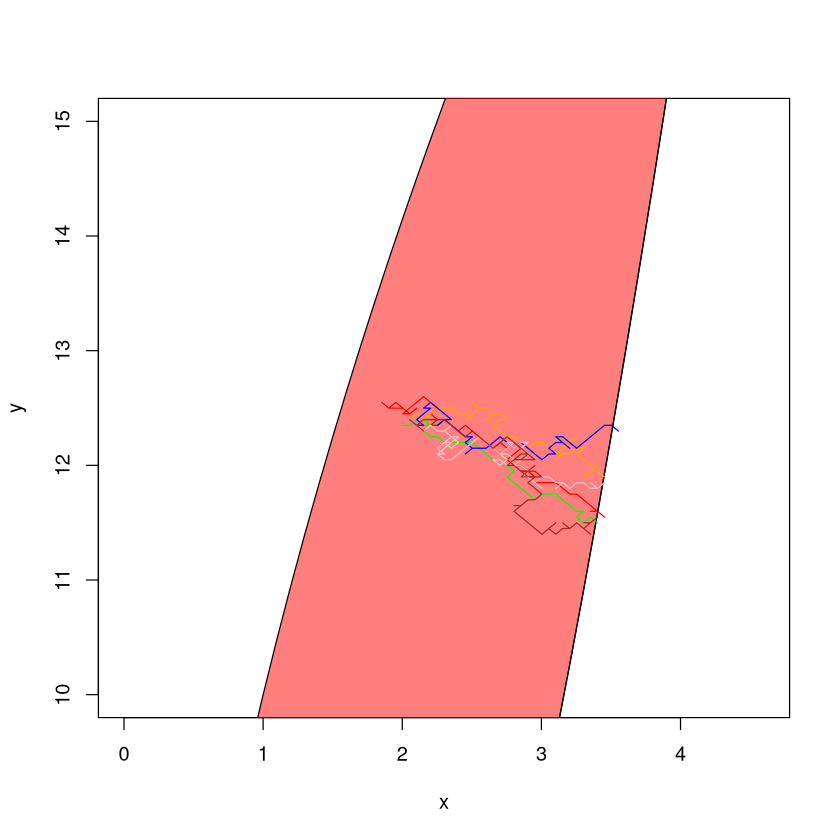

In [11]:
# Tomamos un entorno adecuado sobre el que pintar las sucesiones
x = seq(from = 0, to = 10^(2/3), by = 0.1)
plot(x,f1(x), type="l", ylim=c(10,15), ylab = "y")
polygon(
    c(x,rev(x)),
    c(f1(x), rev(f2(x))),
    col=rgb(1, 0, 0,0.5)
)
# Creamos un array de colores
colors = c("Green", "Red", "Orange", "Blue", "Pink", "Brown")
# Realizamos los 6 experimentos
for(i in 1:6){
    a <- ej4(P0,6000)
    Xs <- a$X
    Ys <- a$Y
    # En cada experimento pintamos con un color distinto
    points(Xs, Ys, type="l", col=colors[[i]])
}

# Ejercicio 8.
**Escribe una función con un argumento que permita repetir un número de veces, $n$, este proceso y devuelva un vector con el número de pasos necesarios para salir del recinto en cada repetición.**

In [12]:
exp1 <- function(n, M=1000){
    a <- 0
    for(i in 1:n){
        # En cada iteración guardamos los pasos necesarios
        a[[i]] <- ej4(P0,M)$Pasos
    }
    return(a)
}

Mostramos un ejemplo de 10 ejecuciones

In [13]:
exp1(10)

[1] 61 96 67 57 91 70 68 89 53 60

# Ejercicio 9.
**Analiza el vector que se obtiene con la función anterior para $n=1000$ y $M=3000$ y comenta cómo es la distribución del parámetro pasos necesarios para llegar al límite en este proceso. ¿Es $M$ suficientemente grande? A la luz de lo obtenido, indica razonadamente si habría que usar un valor mayor o no, y en caso afirmativo, repítelo alterando el valor de $M$.**

Ejecutamos los 1000 experimentos.

In [14]:
res <- exp1(1000, 3000)

Utilizamos la función `summary` para ver el mínimo, máximo, cuartiles, media y mediana de la distribución empírica.

In [15]:
summary(res)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  35.00   54.00   62.50   65.06   74.00  129.00 

Podemos utilizar la función `var` para ver la varianza de la distribución.

In [16]:
var(res)

[1] 241.9572

Utilizamos la función `hist` para mostrar el histograma.

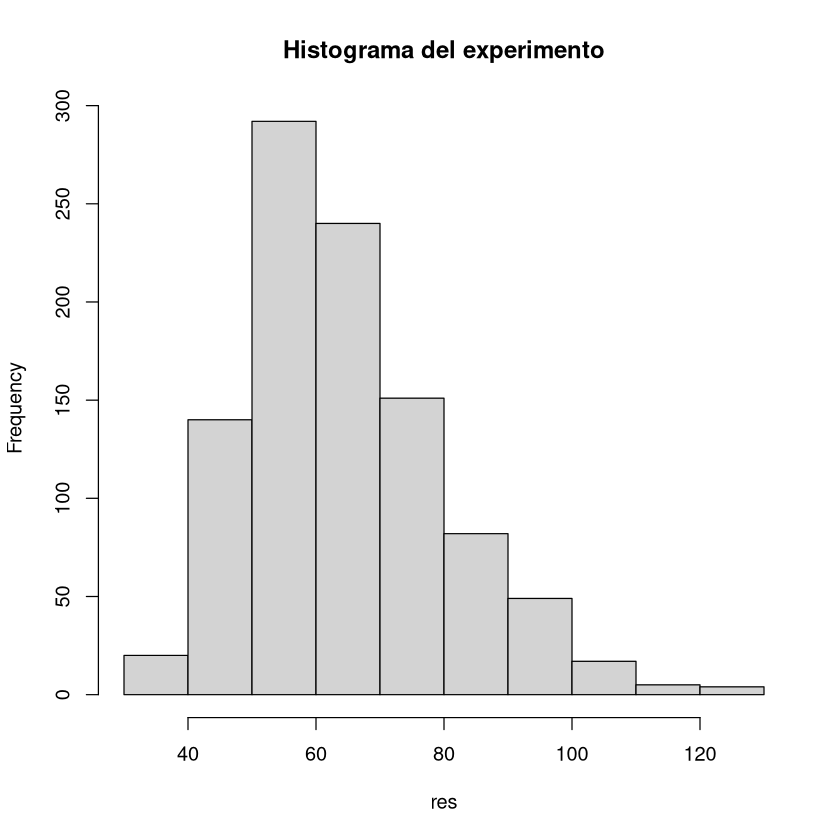

In [47]:
hist(res, main="Histograma del experimento")

Vemos cierta similitud entre el histograma de la distribución con el de una distribución normal. Sin embargo, al estar definida en $\mathbb{R}^+$ y por la forma del histograma, podemos pensar tambien en una distribución beta extrapolada.

In [49]:
norm_values = rnorm(1000, mean(res), sqrt(var(res)))

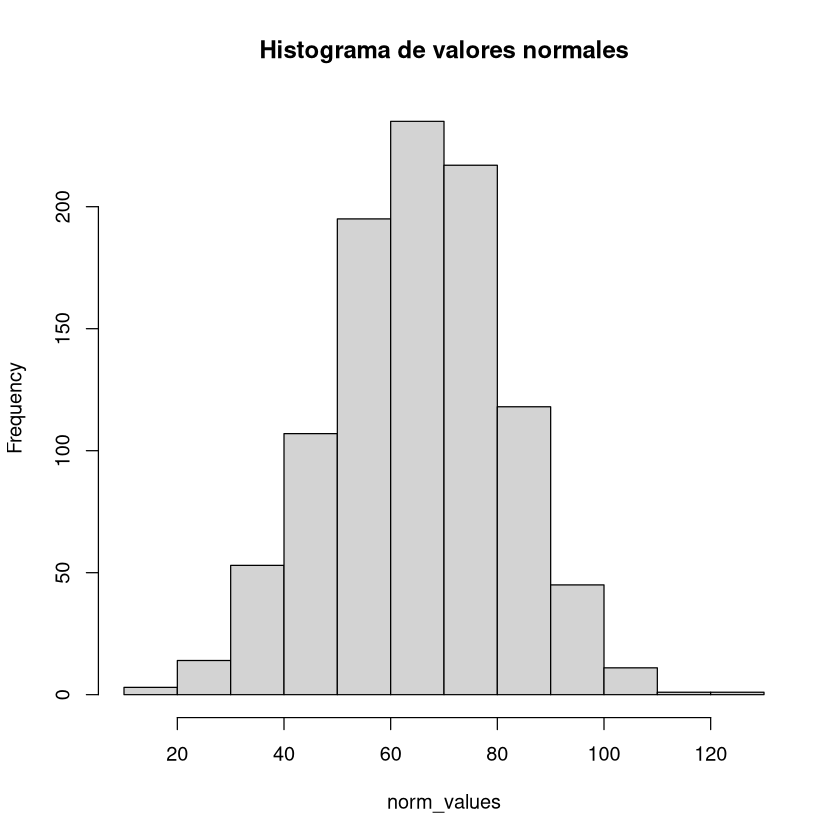

In [50]:
hist(norm_values, main="Histograma de valores normales")

Generamos puntos de una distribución beta y multiplicamos los valores por el cociente de las medias, siendo la media de una distribución $Beta(\alpha, \beta)$, $\frac{\alpha}{\alpha + \beta}$.

In [84]:
beta_values = rbeta(1000, 2,5)
beta_values = beta_values*mean(res)/(2/7)

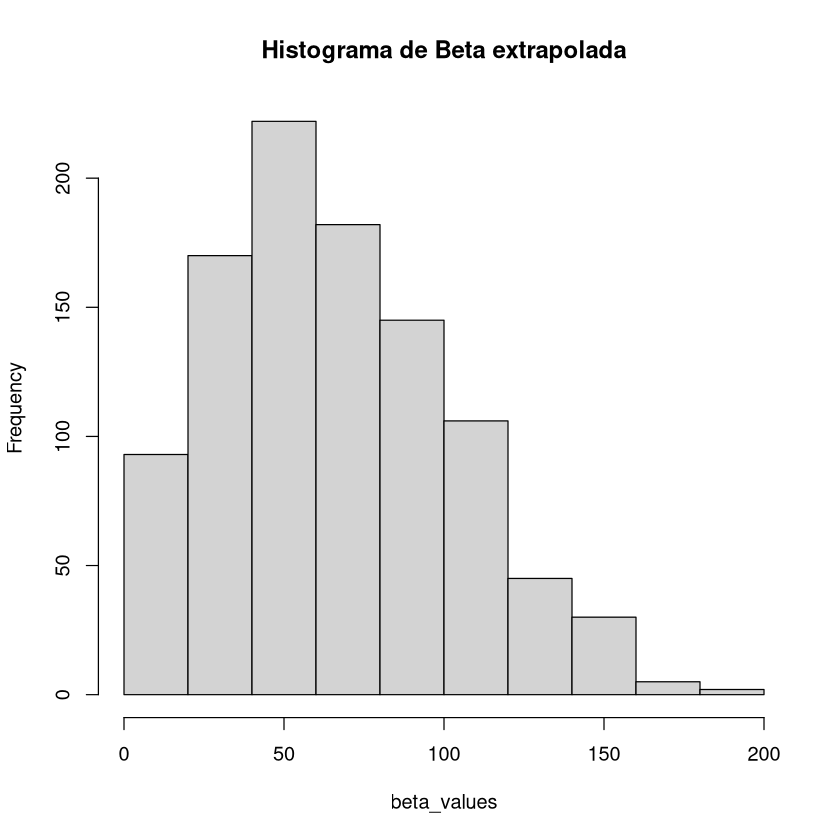

In [85]:
hist(beta_values, main="Histograma de Beta extrapolada")

En cuanto al valor de $M$, el resultado tiene una media de iteraciones de 65, con una varianza de 241, por esto, un valor de $M$ de 3000 es mucho más que suficiente para realizar el experimento.